# Business Problem

In this notebook,I will use an open data set with data on the passengers aboard the infamous doomed sea voyage of 1912. By examining factors such as class, sex, and age, we will use machine learning algorithms and build a program that can predict whether a given passenger would have survived this disaster.

# Introduction

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, 
after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 
passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime 
disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of 
three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in
Belfast. Thomas Andrews, her architect, died in the disaster.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading the training dataset into pandas dataframe.

In [2]:
train=pd.read_csv('Downloads/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## What is the shape of the train dataset?

In [3]:
train.shape

(891, 12)

## Reading the test dataset into pandas dataframe.

In [4]:
test=pd.read_csv('Downloads/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## What is the shape of the test dataset?

In [5]:
test.shape

(418, 11)

## Combining both train and test sets.

In [6]:
data=train.append(test)
data.shape

(1309, 12)

In [7]:
passenger_id=test["PassengerId"]

## Setting the PassengerId as the Index for both training and test sets.

In [8]:
train.set_index(["PassengerId"],inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.set_index(["PassengerId"],inplace=True)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Checking for null values in train and test sets.

In [10]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [12]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

## Using misssingno library

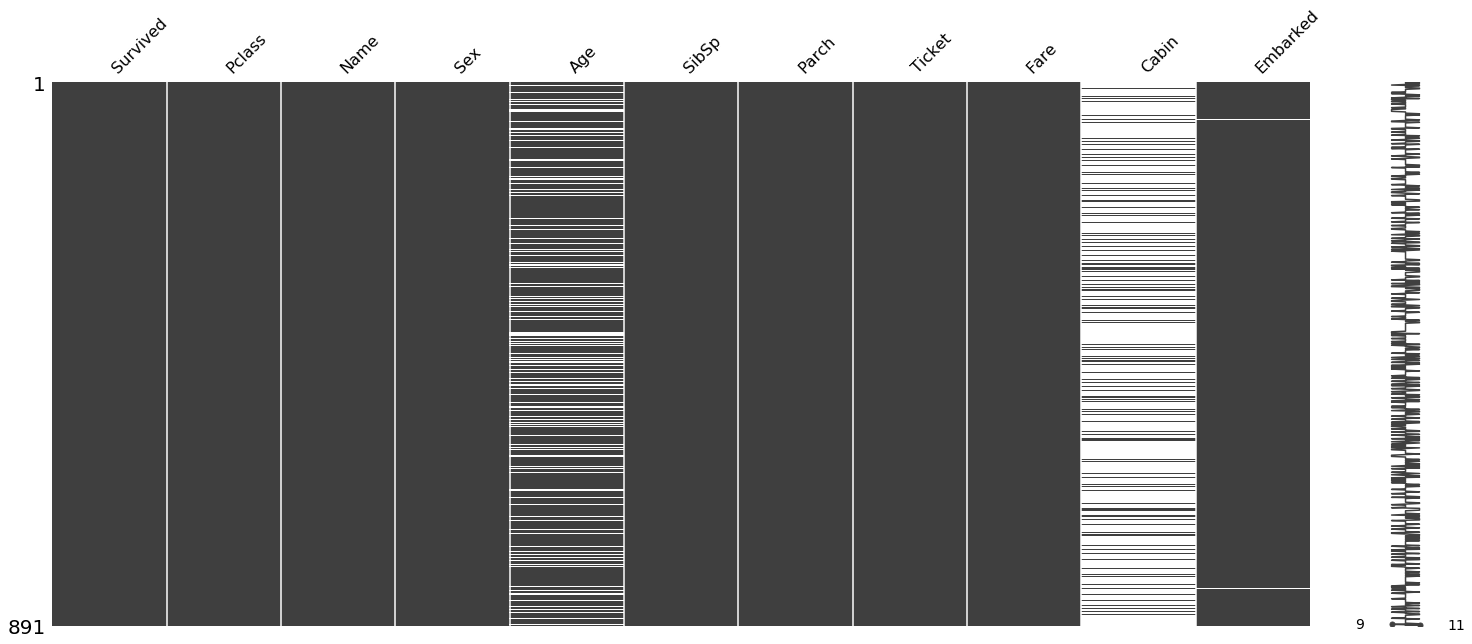

In [13]:
import missingno as mn
mn.matrix(train)

Missingno library offers a very nice way to visualize the distribution of NaN values. It is a Python library and compatible with Pandas.

## Using Imputer Class to deal with the 'Age' Column missing values.

In [17]:
from sklearn.preprocessing import Imputer
Imp=Imputer(missing_values='NaN',strategy='median',axis=1)
Age2=Imp.fit_transform(train.Age.values.reshape(1,-1))
train['Age2']=Age2.T
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [18]:
from sklearn.preprocessing import Imputer
Imp=Imputer(missing_values='NaN',strategy='median',axis=1)
Age_test=Imp.fit_transform(test['Age'].values.reshape(1,-1))
test['Age_test']=Age_test.T
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_test
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [19]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age2          0
dtype: int64

In [20]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Filling the missing values of 'Embarked' Column.

In [21]:
train["Embarked"].fillna('S',inplace=True)
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Age2          0
dtype: int64

In [22]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Age_test      0
dtype: int64

## Converting the String into an Integer in the 'Embarked' Column.

In [23]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,35.0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,3,28.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,1,54.0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,1,2.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,1,27.0


In [24]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Age_test      0
dtype: int64

## Dealing with the missing values in 'Fare' Column.

In [25]:
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [26]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
Age_test      0
dtype: int64

## Dropping the 'Age' and  'Cabin' Columns in both train and test sets.

In [27]:
train.drop(["Age","Cabin"],axis=1,inplace=True)
test.drop(["Age","Cabin"],axis=1,inplace=True)

In [28]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age2        0
dtype: int64

In [29]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age_test    0
dtype: int64

## Converting the 'Sex' Column into an Integer.

In [30]:
train["Sex"]=train["Sex"].apply(lambda x:0 if x=='female' else 1)
train

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,1,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,2,38.0
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,1,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,1,35.0
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,1,35.0
6,0,3,"Moran, Mr. James",1,0,0,330877,8.4583,3,28.0
7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,51.8625,1,54.0
8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,21.0750,1,2.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,11.1333,1,27.0


In [31]:
test["Sex"]=test["Sex"].apply(lambda x:0 if x=='female' else 1)
test

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_test
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,3,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,1,47.0
894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,3,62.0
895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,1,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,1,22.0
897,3,"Svensson, Mr. Johan Cervin",1,0,0,7538,9.2250,1,14.0
898,3,"Connolly, Miss. Kate",0,0,0,330972,7.6292,3,30.0
899,2,"Caldwell, Mr. Albert Francis",1,1,1,248738,29.0000,1,26.0
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,0,0,2657,7.2292,2,18.0


## Dealing with Outliers.

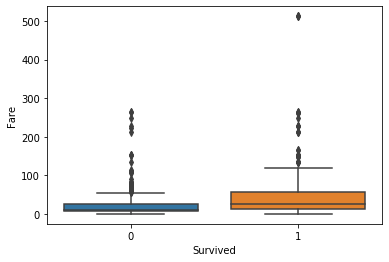

In [32]:
sns.boxplot(x='Survived',y='Fare',data=train)

In [33]:
train=train[train["Fare"]<=400]

In [34]:
train.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age2
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.647523,0.524775,0.381757,30.582164,1.359234,29.341408
std,0.486091,0.834007,0.478011,1.104186,0.806949,41.176366,0.635660,13.037026
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.420000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.895800,1.000000,22.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,1.000000,28.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,30.771850,2.000000,35.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,263.000000,3.000000,80.000000


## Examining the overall chance of survival for a Titanic Passenger.

In [35]:
train['Survived'].mean()

0.38175675675675674

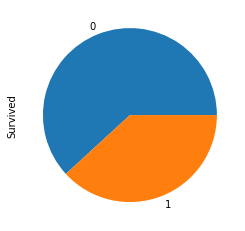

In [36]:
train['Survived'].value_counts().plot.pie()

The calculation shows that only 38% of the passengers survived.

# Univariate Analysis:

## Dealing with the Age-

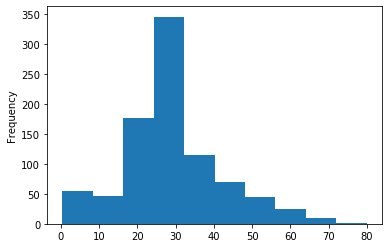

In [43]:
train['Age2'].plot.hist()

In [44]:
train['Age2'].describe().to_frame()

,Age2
count,888.000000
mean,29.341408
std,13.037026
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


## Survival rate by age: The Women and Child first policy.

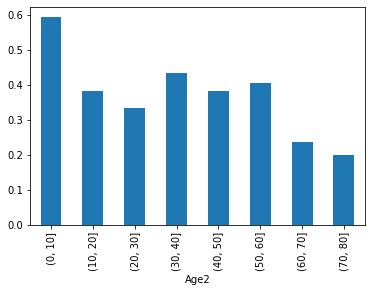

In [124]:
group_by_age = pd.cut(train["Age2"], np.arange(0, 90, 10))
age_grouping = train.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

Here we can see that children were indeed the most likely age group to survive, although this percentage was still tragically below 60%.

## Let us have a look at the Fare Column-

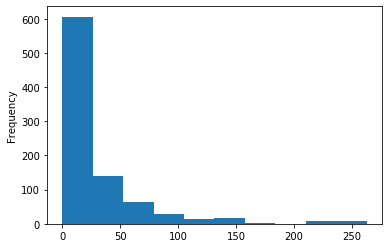

In [45]:
train['Fare'].plot.hist()

In [50]:
train['Fare'].describe().to_frame()

,Fare
count,888.000000
mean,30.582164
std,41.176366
min,0.000000
25%,7.895800
50%,14.454200
75%,30.771850
max,263.000000


# Grouping by Fare:

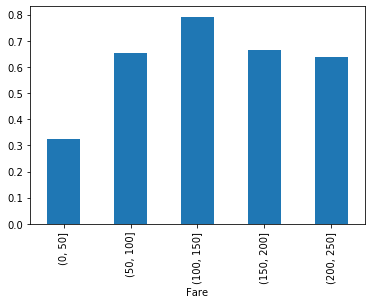

In [123]:
group_by_fare = pd.cut(train["Fare"], np.arange(0, 300, 50))
fare_group=train.groupby(group_by_fare).mean()
fare_group['Survived'].plot.bar()

The passengers who paid fare between 100-150 had a survival rate of a little less than 80%.

# Grouping by Class:

## What does the Class column tell us?

In [56]:
class_grouping=train.groupby('Pclass').mean()
class_grouping

,Survived,Sex,SibSp,Parch,Fare,Embarked,Age2
Pclass,,,,,,,
1,0.624413,0.563380,0.422535,0.356808,78.124061,1.403756,36.832958
2,0.472826,0.586957,0.402174,0.380435,20.662183,1.125000,29.765380
3,0.242363,0.706721,0.615071,0.393075,13.675550,1.427699,25.932627


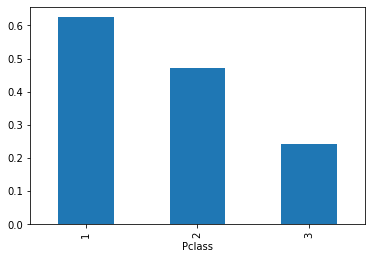

In [58]:
class_grouping['Survived'].plot.bar()

Passengers in first class had a 62% chance of survival, compared to a 24.2% chance for those in 3rd class. 

# Bivariate Analysis:

## Grouping by sex and class.

In [51]:
sex_class_grouping=train.groupby(['Pclass','Sex']).mean()
sex_class_grouping

Survived     SibSp     Parch        Fare  Embarked       Age2
Pclass Sex                                                               
1      0    0.967742  0.559140  0.462366  101.758019  1.473118  33.967742
       1    0.358333  0.316667  0.275000   59.807743  1.350000  39.053500
2      0    0.921053  0.486842  0.605263   21.970121  1.144737  28.703947
       1    0.157407  0.342593  0.222222   19.741782  1.111111  30.512315
3      0    0.500000  0.895833  0.798611   16.118810  1.618056  23.572917
       1    0.135447  0.498559  0.224784   12.661633  1.348703  26.911873

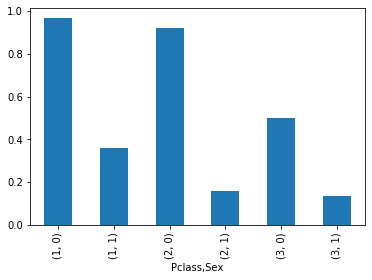

In [52]:
sex_class_grouping['Survived'].plot.bar()

 Across all classes, women were much more likely to survive than the men.

## Grouping by Siblings/Spouses and Parents/Children:

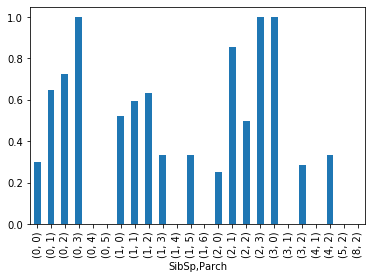

In [132]:
sib_par_group=train.groupby(['SibSp','Parch']).mean()
sib_par_group['Survived'].plot.bar()

We can have a look at the barchart to have an idea about the survival of the passengers.

# Multivariate Analysis:

## Finding the correlations between the features using Heatmap.

In [59]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age2
Survived,1.000000,-0.334068,-0.545899,-0.033395,0.082157,0.261742,0.102964,-0.067081
Pclass,-0.334068,1.000000,0.132881,0.080937,0.018212,-0.604960,0.051321,-0.338998
Sex,-0.545899,0.132881,1.000000,-0.114799,-0.247003,-0.222361,-0.117097,0.081203
SibSp,-0.033395,0.080937,-0.114799,1.000000,0.415141,0.211816,-0.058472,-0.232732
Parch,0.082157,0.018212,-0.247003,0.415141,1.000000,0.263910,-0.078641,-0.172623
Fare,0.261742,-0.604960,-0.222361,0.211816,0.263910,1.000000,0.035497,0.098801
Embarked,0.102964,0.051321,-0.117097,-0.058472,-0.078641,0.035497,1.000000,-0.010746
Age2,-0.067081,-0.338998,0.081203,-0.232732,-0.172623,0.098801,-0.010746,1.000000


# What is a Heatmap?

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

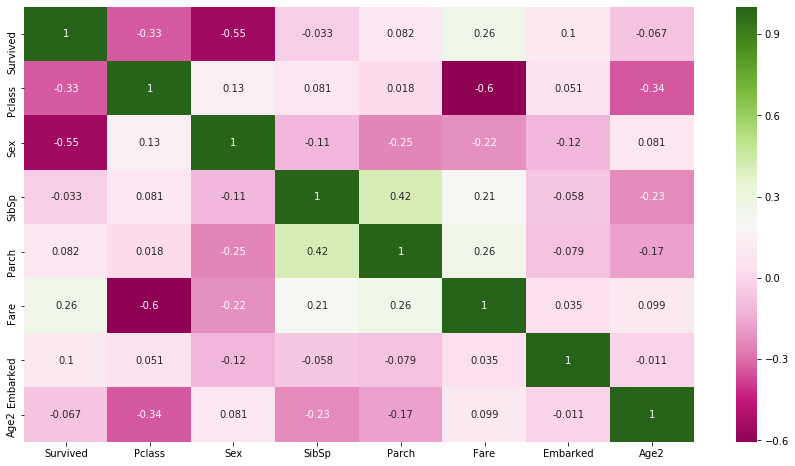

In [60]:
plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap='PiYG')

## Positive Correlation Features:

Fare and Survived:0.26

There is a positive correlation between fare and survived meaning the passengers who paid more amount of fare had a higher chance of survival.

## Negative Correlation Features:

Sex and Survived: -0.55

This is the information about the passenger being a male or a female.

Pclass and Survived: -0.33

Higher the Class, lower the rate of survival
Eg: If the class is 3, then the respective passenger will have the least chance of survival.

## Which gender had a higher chance of survival?

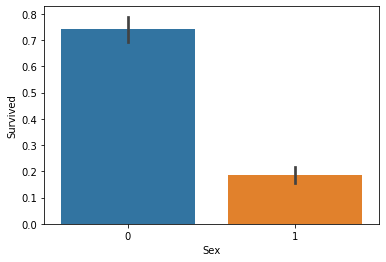

In [47]:
sns.barplot(x='Sex',y='Survived',data=train)

The barplot shows that women had a higher chance of survival.

## Was the chance of survival dependant on the class?

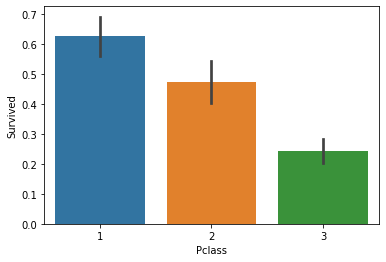

In [48]:
sns.barplot(x='Pclass',y='Survived',data=train)

1st class people had a lucky escape!

## Counting the total number of people in a family.

In [49]:
train["family_size"]=train['SibSp']+train['Parch']+1
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,1,22.0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,2,38.0,2
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,1,26.0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,1,35.0,2
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,1,35.0,1


In [50]:
train["family_size"].value_counts()

1     535
2     160
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

## Creating a new function so as to understand the family size.

In [51]:
def family_group(size):
    a=''
    
    if(size<=1):
        a='alone'
        
    elif(size<=4):
        a='small'
        
    else:
        a='large'
        
    return a

train["family_group"]=train["family_size"].map(family_group)

In [52]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,1,22.0,2,small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,2,38.0,2,small
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,1,26.0,1,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,1,35.0,2,small
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,1,35.0,1,alone


## Making a new feature named 'Age Group' which gives us an idea about the age.

In [53]:
def age_group(age):
    a=''
    
    if(age<=1):
        a='infant'
        
    elif(age<=4):
        a='toddler'
        
    elif(age<=14):
        a='child'
        
    elif(age<=15):
        a='teenager'
        
    elif(age<=25):
        a='young_adult'
        
    elif(age<=40):
        a='adult'
        
    elif(age<=55):
        a='middle_age'
        
    else:
        a='old'
        
    return a
    
    
train["age_group"]=train["Age2"].map(age_group)
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group,age_group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,1,22.0,2,small,young_adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,2,38.0,2,small,adult
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,1,26.0,1,alone,adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,1,35.0,2,small,adult
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,1,35.0,1,alone,adult


In [54]:
test["family_size"]=test['SibSp']+test['Parch']+1
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_test,family_size
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,3,34.5,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,1,47.0,2
894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,3,62.0,1
895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,1,27.0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,1,22.0,3


In [55]:
def family_group(size):
    a=''
    
    if(size<=1):
        a='alone'
        
    elif(size<=4):
        a='small'
        
    else:
        a='large'
        
    return a

test["family_group"]=test["family_size"].map(family_group)

In [56]:
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_test,family_size,family_group
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,3,34.5,1,alone
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,1,47.0,2,small
894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,3,62.0,1,alone
895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,1,27.0,1,alone
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,1,22.0,3,small


In [57]:
def age_group(age):
    a=''
    
    if(age<=1):
        a='infant'
        
    elif(age<=4):
        a='toddler'
        
    elif(age<=14):
        a='child'
        
    elif(age<=15):
        a='teenager'
        
    elif(age<=25):
        a='young_adult'
        
    elif(age<=40):
        a='adult'
        
    elif(age<=55):
        a='middle_age'
        
    else:
        a='old'
        
    return a
    
    
test["age_group"]=test["Age_test"].map(age_group)
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_test,family_size,family_group,age_group
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,3,34.5,1,alone,adult
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,1,47.0,2,small,middle_age
894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,3,62.0,1,alone,old
895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,1,27.0,1,alone,adult
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,1,22.0,3,small,young_adult


## Calculating the Fare per Person.

In [58]:
train["fare_per_person"]=train["Fare"]/train["family_size"]
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group,age_group,fare_per_person
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,1,22.0,2,small,young_adult,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,2,38.0,2,small,adult,35.64165
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,1,26.0,1,alone,adult,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,1,35.0,2,small,adult,26.55000
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,1,35.0,1,alone,adult,8.05000


## The 'Fare Group' feature will give us an idea about the amount paid.

In [59]:
def fare_group(Fare):
    a=''
    
    if(Fare<=4):
        a='very_low'
        
    elif(Fare<=10):
        a='low'
        
    elif(Fare<=20):
        a='mid'
        
    elif(Fare<=45):
        a='high'
        
    else:
        a='very_high'
        
    return a

train["fare_group"]=train["fare_per_person"].map(fare_group)
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group,age_group,fare_per_person,fare_group
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,1,22.0,2,small,young_adult,3.62500,very_low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,2,38.0,2,small,adult,35.64165,high
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,1,26.0,1,alone,adult,7.92500,low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,1,35.0,2,small,adult,26.55000,high
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,1,35.0,1,alone,adult,8.05000,low


In [60]:
test["fare_per_person"]=test["Fare"]/test["family_size"]
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_test,family_size,family_group,age_group,fare_per_person
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,3,34.5,1,alone,adult,7.829200
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,1,47.0,2,small,middle_age,3.500000
894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,3,62.0,1,alone,old,9.687500
895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,1,27.0,1,alone,adult,8.662500
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,1,22.0,3,small,young_adult,4.095833


In [61]:
def fare_group(Fare):
    a=''
    
    if(Fare<=4):
        a='very_low'
        
    elif(Fare<=10):
        a='low'
        
    elif(Fare<=20):
        a='mid'
        
    elif(Fare<=45):
        a='high'
        
    else:
        a='very_high'
        
    return a

test["fare_group"]=test["fare_per_person"].map(fare_group)
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_test,family_size,family_group,age_group,fare_per_person,fare_group
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,3,34.5,1,alone,adult,7.829200,low
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,1,47.0,2,small,middle_age,3.500000,very_low
894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,3,62.0,1,alone,old,9.687500,low
895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,1,27.0,1,alone,adult,8.662500,low
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,1,22.0,3,small,young_adult,4.095833,low


## Dropping unessential columns.

In [62]:
train.drop(['Name','Ticket','Fare','fare_group','family_group','age_group'],axis=1,inplace=True)

In [63]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age2,family_size,fare_per_person
PassengerId,,,,,,,,,
1,0,3,1,1,0,1,22.0,2,3.62500
2,1,1,0,1,0,2,38.0,2,35.64165
3,1,3,0,0,0,1,26.0,1,7.92500
4,1,1,0,1,0,1,35.0,2,26.55000
5,0,3,1,0,0,1,35.0,1,8.05000


In [64]:
test.drop(['Name','Ticket','Fare','fare_group','family_group','age_group'],axis=1,inplace=True)

In [65]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_test,family_size,fare_per_person
PassengerId,,,,,,,,
892,3,1,0,0,3,34.5,1,7.829200
893,3,0,1,0,1,47.0,2,3.500000
894,2,1,0,0,3,62.0,1,9.687500
895,3,1,0,0,1,27.0,1,8.662500
896,3,0,1,1,1,22.0,3,4.095833


In [66]:
X_train=train.drop('Survived',axis=1)
y_train=train['Survived']
X_test=test.copy()

## Importing the necessary modules.

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Using Machine Learning Algorithms to predict the survival.

# Random Forest  Classifier:

## How does it work?

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

In [68]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

# Logistic Regression :

## Working-

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [69]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

# Gaussian Naive Bayes :

## Let us see how it works-

## Understanding the Bayes Theorem first:

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

 **P(A|B) = {P(B|A) P(A)}/{P(B)}** 

Primarily Naïve Bayes is a linear classifier, which is a supervised machine learning method and works as a probabilistic classifier as well.  When handling real-time data with continuous distribution, Naïve Bayes classifier considers that the big data is generated through a Gaussian process with normal distribution. 

In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values.

In [70]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)


# K Nearest Neighbor :

## What is Knn?

KNN can be used for classification — the output is a class membership (predicts a class — a discrete value). An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. 

In [71]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

# Decision Tree :

## Getting to know Decision Tree Classifiers-

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [72]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

# Linear Support Vector Machine :

## SVM?

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.
In addition to performing linear classification, SVMs can efficiently perform a non-linear classification, implicitly mapping their inputs into high-dimensional feature spaces.

In [73]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

# Finding out the Best Model :

In [74]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
97.97,Random Forest
97.97,Decision Tree
85.59,KNN
80.18,Logistic Regression
78.60,Support Vector Machines
77.14,Naive Bayes


As we can see, the Random Forest classifier goes on the first place.

# How to assure ourselves with the best model?

In machine learning, we couldn’t fit the model on the training data and can’t say that the model will work accurately for the real data. For this, we must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique.

# Cross Validation:

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

The three steps involved in cross-validation are as follows :

1. Reserve some portion of sample data-set.
2. Using the rest data-set train the model.
3. Test the model using the reserve portion of the data-set.

# K-Fold Cross Validation :

## What is K-Fold Cross Validation?

In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

In [75]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76404494 0.80898876 0.75280899 0.84269663 0.88764045 0.83146067
 0.83146067 0.76404494 0.82022472 0.82758621]
Mean: 0.8130956993413404
Standard Deviation: 0.03978917537769276


# Feature Importance :

## Getting to know which are the most important features-

In [76]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.268
fare_per_person,0.260
Age2,0.257
Pclass,0.072
family_size,0.053
Embarked,0.033
SibSp,0.032
Parch,0.024


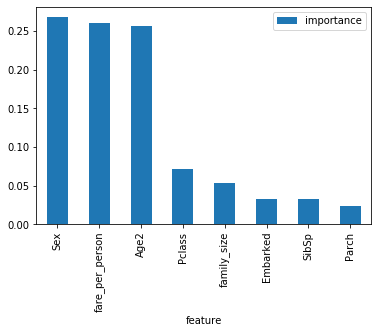

In [77]:
importances.plot.bar()

We can see the importance of every feature from the bar plot.

# Training Random Forest again :

In [78]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.97 %


## Taking a look at the predictions :

In [79]:
y_prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Converting the array into the Dataframe:

In [80]:
output = pd.DataFrame({ 'PassengerId' : passenger_id, 'Survived': y_prediction })
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
